#**Emotion Detection of Text Using Machine Learning and Python**

##**Importing Packages**

In [3]:
#Load Packages
import pandas as pd
import numpy as np

#Load data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
!pip install neattext
import neattext.functions as nfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Load the Dataset
df=pd.read_excel("/emotion_dataset.xlsx")


In [5]:
#Preview
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [6]:
#Shape
df.shape

(34792, 2)

In [7]:
#Data Types
df.dtypes

Emotion    object
Text       object
dtype: object

In [8]:
#check for missing values
df.isnull().sum()

Emotion    0
Text       6
dtype: int64

In [9]:
#value count of Emotions
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

##**Data Visualization using Bar Graph**

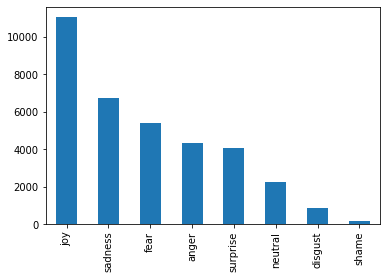

In [10]:
#value count of Emotions
df['Emotion'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


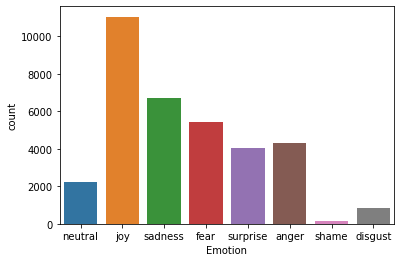

In [11]:
#using seaborn to plot
#old method
sns.countplot(df['Emotion'])

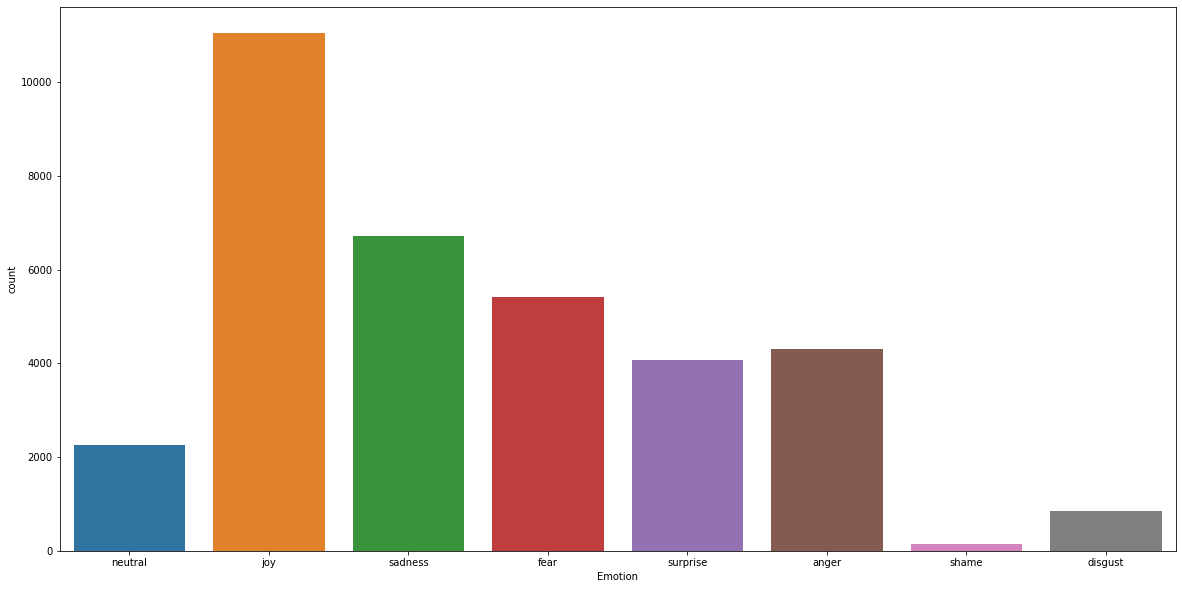

In [12]:
#new method
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)
plt.show()

In [13]:
#Exploration


##**Exploration**##


*  **Text Cleaning**
*  **Sentiment Analysis**
*  **Keyword Extraction**
   * **Keywords for each Emotions**
   * **WordCloud**

##**Sentimental Analysis**

In [14]:
#Sentimental Analysis
from textblob import TextBlob

In [15]:
def get_sentiment(text):
    try:
        sentiment=TextBlob(text).sentiment.polarity
        if sentiment > 0:
            result="Positive"
        elif sentiment < 0:
            result="Negative"
        else:
            result="Neutral"
        return result
    except:
        return None

In [16]:
#testing
get_sentiment("How are you?")

'Neutral'

In [17]:
df['sentiment']=df['Text'].apply(get_sentiment)
df.head()

,Emotion,Text,sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [18]:
#Compare our emotion vs sentiment
df.groupby(['Emotion','sentiment']).size()

Emotion   sentiment
anger     Negative     1786
          Neutral      1386
          Positive     1124
disgust   Negative      323
          Neutral       250
          Positive      281
fear      Negative     1532
          Neutral      1845
          Positive     2032
joy       Negative     1683
          Neutral      3662
          Positive     5699
neutral   Negative      178
          Neutral      1522
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1964
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1548
          Positive     1891
dtype: int64

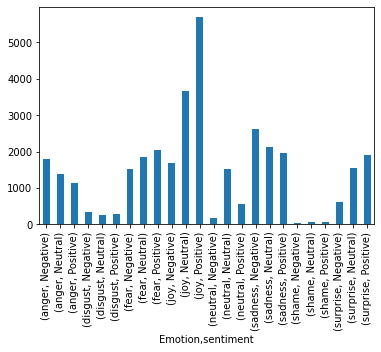

In [19]:
#First Method using Matplotlib
#Compare our emotion vs sentiment
df.groupby(['Emotion','sentiment']).size().plot(kind="bar")

In [20]:
#Using Seaborn
sns.factorplot
sns.catplot

<function seaborn.categorical.catplot>

##**Factor Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


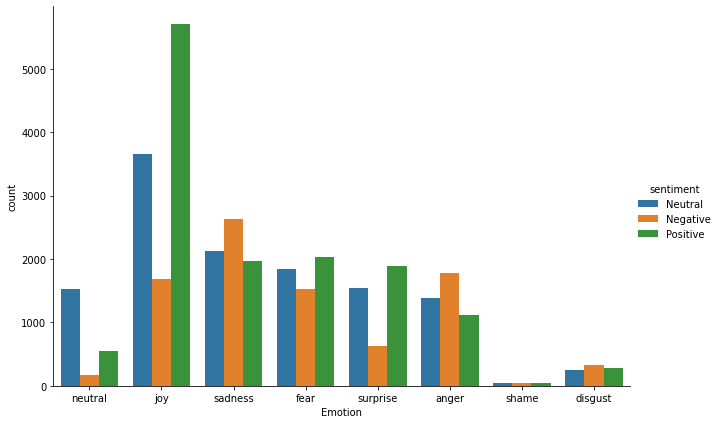

In [21]:
sns.factorplot(x='Emotion',hue='sentiment',data=df,kind='count',size=6,aspect=1.5)

##**Cat Plot**

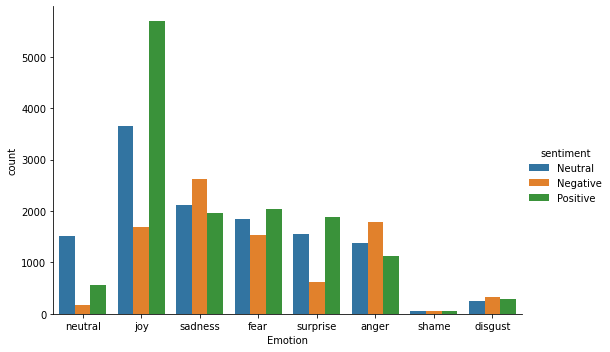

In [22]:
sns.catplot(x='Emotion',hue='sentiment',data=df,kind='count',aspect=1.5)

##**Text Cleaning**##
*  **Remove Noise** 
*  **Stopwords**
*  **Special Characters**
*  **Punctuations**
*  **Emojis** 


In [23]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

##**Data Preprocessing**

In [24]:
#DROPPING NULL VALUES
df.dropna( inplace = True )

In [25]:
#REMOVING STOP WORDS
df['clean_text']=df['Text'].apply(nfx.remove_stopwords)

In [26]:
#REMOVING USER_HANDLES
df['clean_text']=df['clean_text'].apply(nfx.remove_userhandles)

In [27]:
#REMOVING PUNCTUATIONS
df['clean_text']=df['clean_text'].apply(nfx.remove_punctuations)

In [28]:
df[['Text','clean_text']]
df.head()

,Emotion,Text,sentiment,clean_text
0,neutral,Why ?,Neutral,
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral,ugh babe hugggzzz u babe naamazed nga ako e...


#**Keyword Extraction**
##**Extract most common word in the class of Emotion**

In [29]:
from collections import Counter

In [30]:
def extract_keywords(text,num=50):
  tokens=[tok for tok in text.split()]
  most_common_tokens=Counter(tokens).most_common(num)
  return dict(most_common_tokens)

extract_keywords("The Best Reaction is no Reaction.")

{'Best': 1, 'Reaction': 1, 'Reaction.': 1, 'The': 1, 'is': 1, 'no': 1}

In [31]:
#list of emotion
emotion_list=df["Emotion"].unique().tolist()
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [32]:
joy_list=df[df['Emotion']=='joy']['clean_text'].tolist()
#Joy Document
joy_docx=' '.join(joy_list)
joy_docx

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  â€™ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome    brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jammi

In [33]:
#Extract Keywords
keyword_joy=extract_keywords(joy_docx)
keyword_joy

{'2': 262,
 ':)': 311,
 'Christmas': 453,
 'God': 177,
 'Im': 555,
 'RT': 159,
 'amp': 678,
 'cant': 165,
 'class': 141,
 'day': 729,
 'days': 208,
 'excited': 145,
 'family': 181,
 'feel': 227,
 'feeling': 159,
 'felt': 167,
 'friend': 169,
 'friends': 155,
 'going': 304,
 'good': 345,
 'got': 328,
 'great': 194,
 'happy': 368,
 'home': 302,
 'hour': 172,
 'hours': 251,
 'it': 162,
 'joy': 257,
 'know': 177,
 'life': 251,
 'like': 476,
 'long': 204,
 'love': 393,
 'me': 196,
 'morning': 287,
 'new': 181,
 'night': 331,
 'people': 201,
 'right': 142,
 's': 180,
 'school': 297,
 'sleep': 185,
 'think': 148,
 'time': 602,
 'today': 471,
 'tomorrow': 467,
 'tonight': 205,
 'week': 231,
 'work': 509,
 'year': 225}

##**Plotting the Graph - Data Visualization**

In [34]:
#Plot
def plot_most_common_words(mydict,emotion_name):
  df_01=pd.DataFrame(mydict.items(),columns=['token','count'])
  plt.figure(figsize=(20,10))
  plt.title("Plot of {} most common keywords".format(emotion_name))
  sns.barplot(x='token',y='count',data=df_01)
  plt.xticks(rotation=45)
  plt.show()

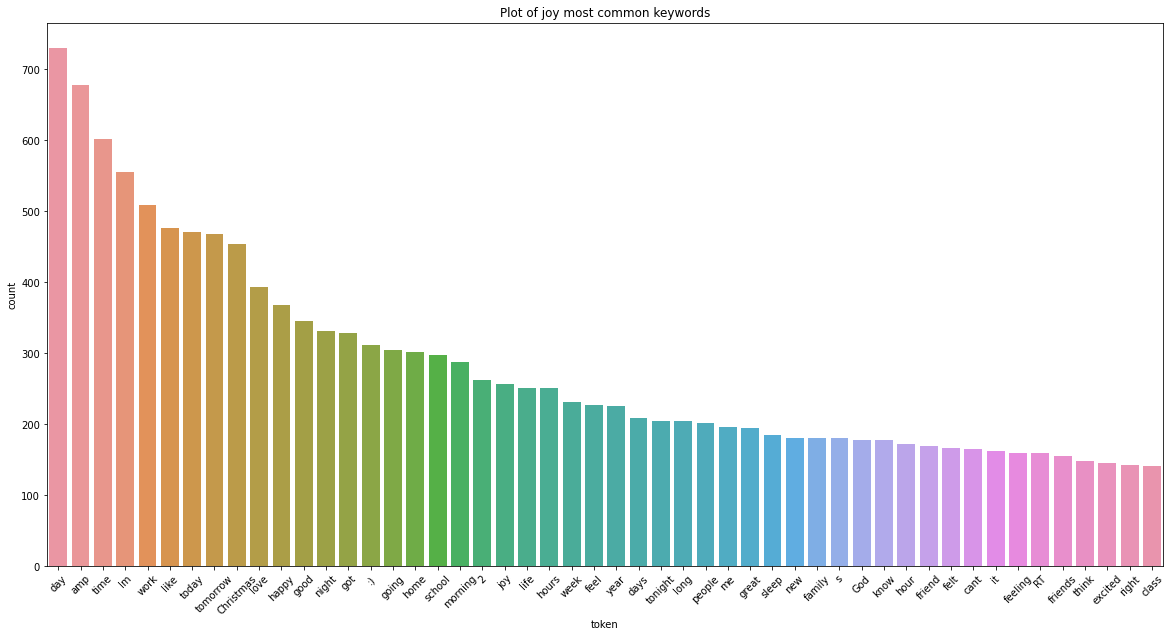

In [35]:
plot_most_common_words(keyword_joy,"joy")

##**Plotting the Graph - Data Visualization**

In [36]:
surprise_list=df[df['Emotion']=='surprise']['clean_text'].tolist()
#Joy Document
surprise_docx=' '.join(surprise_list)
surprise_docx

'maken Tip 2: Stop op een moment dat je het hele project wel ziet zitten Nu dus #derestkomtlaterwel En dan krijg je ff een cadeautje van een tweep #melike   Drummer Boy bij op verzoek van      : welke uitvoering van wie Haha course come home different house leave parents redo entire downstairs warning   reeeeeellllyyyyyyy need tell something guess what phone fucked up #gotohellmexicanphone ending pooped pants end weeks crazy ending #dEcodEd pop amp roll floor  alleen nog morgen cadootjes kopen stadje en dan helemaal klaar Im planet Im planets hold life amp discovered Good Morning Store Today #EnjoyTheDay forgot hair red looked mirror Stopped today gas small town attendant came tell quotwe #service young #tweeters clue Cant wait   open christmas prezzie #christmas Decorating entire house christmas cheer mommy Iemand nog surprise idee voor een vrouw trouble comes realise gone watching reruns living one #oh   thought Id stop SPEND CHRISTMAS HOLIDAYS LAKE Miss you chocomousse vergt 175 ml 

In [37]:
#Extract Keywords
keyword_surprise=extract_keywords(surprise_docx)
keyword_surprise

{')': 74,
 '2': 69,
 '5': 73,
 ':)': 201,
 'Christmas': 84,
 'Im': 227,
 'RT': 124,
 'actually': 93,
 'amp': 124,
 'best': 70,
 'birthday': 101,
 'coming': 92,
 'dan': 87,
 'day': 143,
 'de': 251,
 'een': 294,
 'en': 299,
 'friends': 79,
 'going': 116,
 'good': 101,
 'got': 126,
 'het': 96,
 'home': 160,
 'ik': 137,
 'je': 110,
 'know': 165,
 'la': 74,
 'like': 117,
 'lol': 89,
 'love': 126,
 'met': 125,
 'mom': 83,
 'new': 72,
 'night': 93,
 'nog': 126,
 'op': 76,
 'people': 68,
 'school': 69,
 'special': 69,
 'surprise': 114,
 'think': 80,
 'thought': 70,
 'time': 120,
 'today': 150,
 'tomorrow': 105,
 'u': 82,
 'van': 153,
 'voor': 116,
 'wait': 97,
 'work': 68}

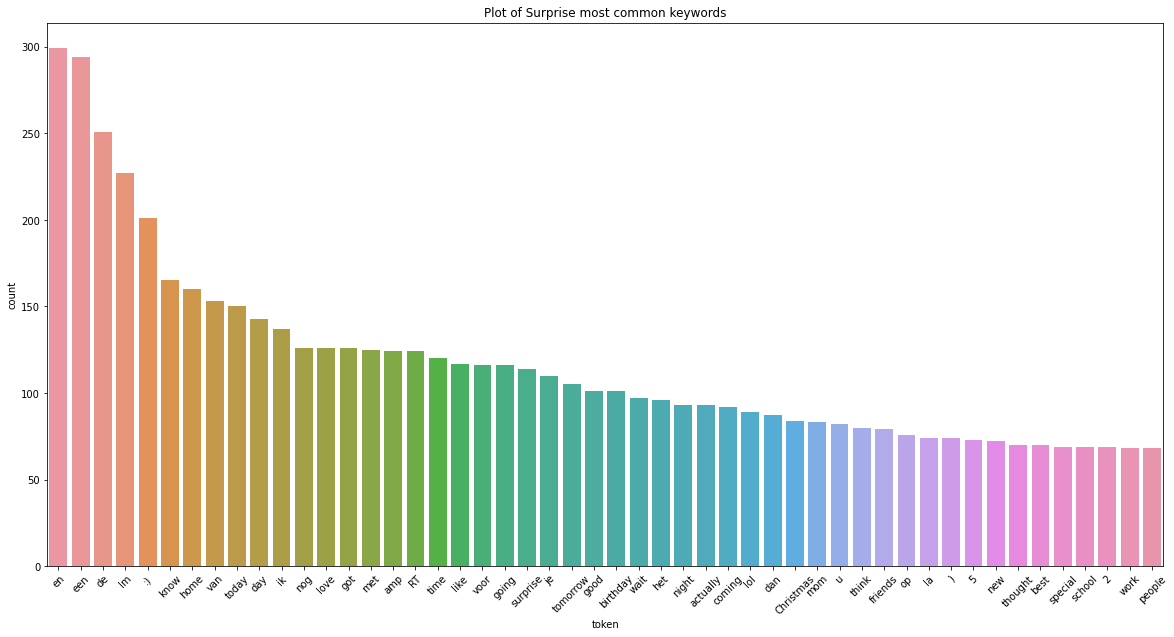

In [38]:
plot_most_common_words(keyword_surprise,"Surprise")

##**Data Visualization using WordCloud**

In [39]:
#WordCloud
from wordcloud import WordCloud

In [40]:
def plot_wordcloud(docx):
  mywordcloud=WordCloud().generate(docx)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

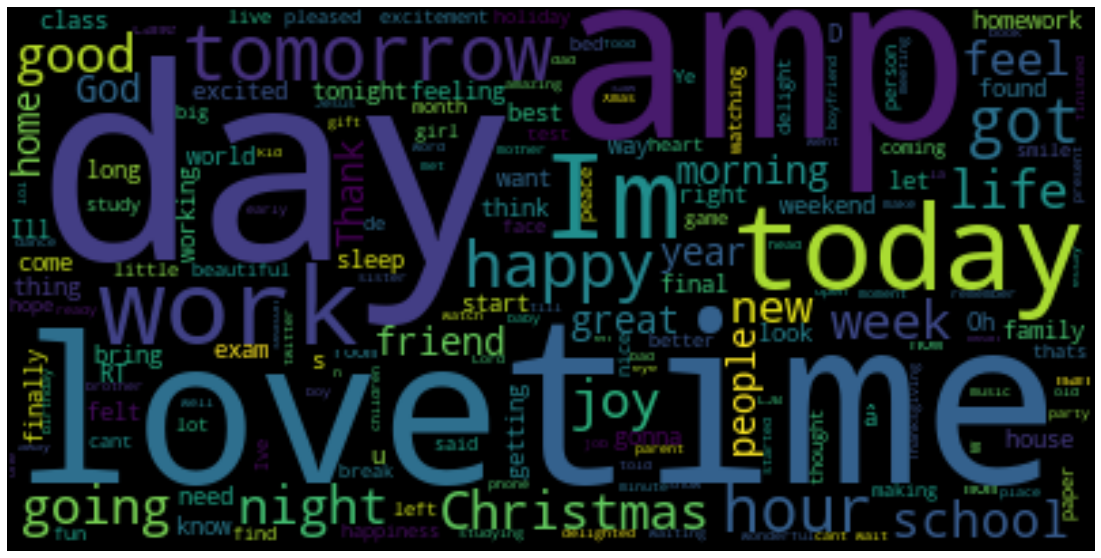

In [41]:
plot_wordcloud(joy_docx)

In [42]:
#plot_wordcloud(surprise_docx)

##**Machine Learning Algorithms used here:**##
* **Naive Bayes**
* **Logistic Regression**





In [43]:
# Load ML Packages
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Vectorizers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Split our dataset
from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,confusion_matrix

In [44]:
#Build features from text
X_features=df["clean_text"]
y_labels=df["Emotion"]
X_features=X_features.str.lower()
X_features

0                                                         
1                           sage act upgrade list tommorow
2        way homegirl baby funeral man hate funerals sh...
3        eye  true hazel eyeand brilliant  regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift hope like it hand wear  itll warm lol
34788           world didnt meso world definitely cnt away
34789                                    man robbed today 
34790                            youu jealousy #losing you
34791                                think baby dream time
Name: clean_text, Length: 34785, dtype: object

In [45]:
from numpy.ma.core import count
# Vectorizers
CV=CountVectorizer()
X=CV.fit_transform(X_features)

In [46]:
#Get features by Name
CV.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '000ã',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '100â',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ã',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12h

In [47]:
#To dense array
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
#Split dataset
X_train,X_test,y_train,y_test=train_test_split(X,y_labels,test_size=0.2,random_state=42)

##**Model Training for Naive Bayes**

In [49]:
#Build our Model
#model_training
nv_model=MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [50]:
#Accuracy for Naive Bayes 
nv_model.score(X_test,y_test)

0.5763978726462555

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


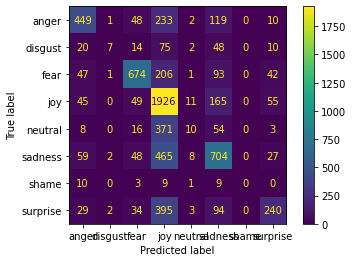

In [51]:
#plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nv_model,X_test,y_test)

## **Model Training for Logistic Regression**

In [52]:
#model training
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [53]:
#accuracy
lr_model.score(X_test,y_test)

0.6419433663935604

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


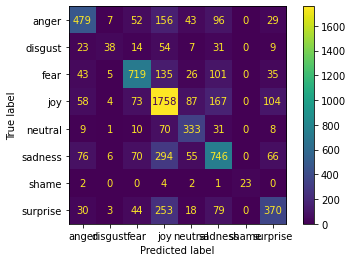

In [54]:
#plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr_model,X_test,y_test)

In [55]:
#Predictions
y_pred_for_nv=nv_model.predict(X_test)

In [56]:
y_pred_for_nv

array(['fear', 'joy', 'sadness', ..., 'sadness', 'anger', 'joy'],
      dtype='<U8')

##**Make a Single Prediction**##


* **Vectorized our Text**
* **Applied our Model**



In [57]:
sample_text=["I love coding so much "]
vect=CV.transform(sample_text).toarray()

#Make Prediction
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [58]:
#Check for the Prediction Probability(Percentage)/Confidence Score
nv_model.predict_proba(vect)

array([[1.29024521e-02, 2.64487622e-04, 1.06283650e-01, 7.21990472e-01,
        2.22801893e-04, 1.43693249e-01, 1.65106082e-06, 1.46412358e-02]])

In [59]:
#Get all classes for our model
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [60]:
np.max(nv_model.predict_proba(vect))

0.7219904723713724

In [61]:
def predict_emotion(sample_text,model):
  myvect=CV.transform(sample_text).toarray()
  prediction=nv_model.predict(myvect)
  predic_proba=nv_model.predict_proba(myvect)
  predic_percentage_for_all=dict(zip(model.classes_,predic_proba[0]))
  print("prediction:{},Prediction score:{}".format(prediction[0],np.max(predic_proba)))
  return predic_percentage_for_all

In [62]:
#Single Predict
predict_emotion(sample_text,lr_model)

prediction:joy,Prediction score:0.7219904723713724


{'anger': 0.0129024521046084,
 'disgust': 0.00026448762191768835,
 'fear': 0.10628365008131381,
 'joy': 0.7219904723713724,
 'neutral': 0.00022280189317887175,
 'sadness': 0.1436932491147641,
 'shame': 1.6510608199586382e-06,
 'surprise': 0.014641235752022053}

## **Prediction and Accuracy for Naive Bayes**

In [63]:
sample_text=["i hate this subject"]
sample_text2=["i love this food so much!"]
sample_text3=["why do you think that he will miss the train?"]

In [64]:
predict_emotion(sample_text,nv_model)

prediction:anger,Prediction score:0.3744773855989114


{'anger': 0.3744773855989114,
 'disgust': 0.0027752874575074538,
 'fear': 0.19070058482422617,
 'joy': 0.11928438466645476,
 'neutral': 0.00015968853516628946,
 'sadness': 0.3024684683650573,
 'shame': 6.5307812689465115e-06,
 'surprise': 0.0101276697714095}

In [65]:
predict_emotion(sample_text2,nv_model)

prediction:joy,Prediction score:0.6099083659686025


{'anger': 0.016346586492522727,
 'disgust': 4.118903337323852e-05,
 'fear': 0.06157213357250074,
 'joy': 0.6099083659686025,
 'neutral': 9.406956290706877e-06,
 'sadness': 0.3083574329046997,
 'shame': 1.082678031787617e-08,
 'surprise': 0.0037648742452282154}

In [66]:
predict_emotion(sample_text3,nv_model)

prediction:sadness,Prediction score:0.6948944451550884


{'anger': 0.059690313677791554,
 'disgust': 2.0708957099771184e-05,
 'fear': 0.024255589067605977,
 'joy': 0.21596636382493772,
 'neutral': 4.317046503432235e-08,
 'sadness': 0.6948944451550884,
 'shame': 1.6185265169914727e-10,
 'surprise': 0.005172535985160517}

##**Prediction and Accuracy for Logistic Regression**

In [67]:
predict_emotion(sample_text,lr_model)

prediction:anger,Prediction score:0.3744773855989114


{'anger': 0.3744773855989114,
 'disgust': 0.0027752874575074538,
 'fear': 0.19070058482422617,
 'joy': 0.11928438466645476,
 'neutral': 0.00015968853516628946,
 'sadness': 0.3024684683650573,
 'shame': 6.5307812689465115e-06,
 'surprise': 0.0101276697714095}

In [68]:
predict_emotion(sample_text2,nv_model)

prediction:joy,Prediction score:0.6099083659686025


{'anger': 0.016346586492522727,
 'disgust': 4.118903337323852e-05,
 'fear': 0.06157213357250074,
 'joy': 0.6099083659686025,
 'neutral': 9.406956290706877e-06,
 'sadness': 0.3083574329046997,
 'shame': 1.082678031787617e-08,
 'surprise': 0.0037648742452282154}

In [69]:
predict_emotion(sample_text3,lr_model)

prediction:sadness,Prediction score:0.6948944451550884


{'anger': 0.059690313677791554,
 'disgust': 2.0708957099771184e-05,
 'fear': 0.024255589067605977,
 'joy': 0.21596636382493772,
 'neutral': 4.317046503432235e-08,
 'sadness': 0.6948944451550884,
 'shame': 1.6185265169914727e-10,
 'surprise': 0.005172535985160517}

In [70]:
#Classification
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.67      0.52      0.59       862
     disgust       0.54      0.04      0.07       176
        fear       0.76      0.63      0.69      1064
         joy       0.52      0.86      0.65      2251
     neutral       0.26      0.02      0.04       462
     sadness       0.55      0.54      0.54      1313
       shame       0.00      0.00      0.00        32
    surprise       0.62      0.30      0.41       797

    accuracy                           0.58      6957
   macro avg       0.49      0.36      0.37      6957
weighted avg       0.57      0.58      0.54      6957



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**Confusion Matrix**

In [71]:
#Confusion
confusion_matrix(y_test,y_pred_for_nv)

array([[ 449,    1,   48,  233,    2,  119,    0,   10],
       [  20,    7,   14,   75,    2,   48,    0,   10],
       [  47,    1,  674,  206,    1,   93,    0,   42],
       [  45,    0,   49, 1926,   11,  165,    0,   55],
       [   8,    0,   16,  371,   10,   54,    0,    3],
       [  59,    2,   48,  465,    8,  704,    0,   27],
       [  10,    0,    3,    9,    1,    9,    0,    0],
       [  29,    2,   34,  395,    3,   94,    0,  240]])

In [72]:
#This is the End of this Program.